<IPython.core.display.Javascript object>


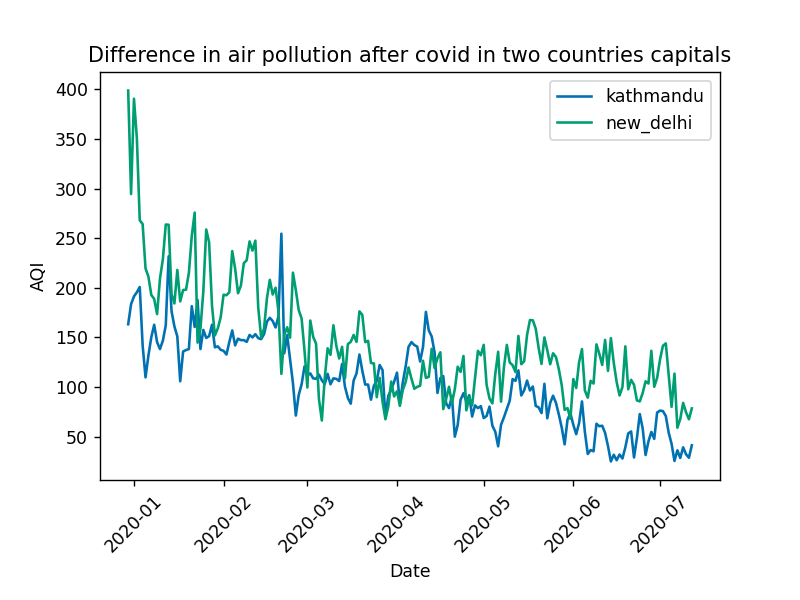

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
%matplotlib notebook 

df = pd.read_csv('waqi-covid19-airqualitydata-2020.csv', header=4,parse_dates=['Date'])
df = df.sort_values(['Date','Country'])
np = df[df['City'].str.contains(r'Kathmandu')]
idn = df[df['City'].str.contains(r'New Delhi')]
pm25_np = np[np['Specie'].str.contains(r'pm25')]
pm25_idn = idn[idn['Specie'].str.contains(r'pm25')]

pm25_np['mean'] = (pm25_np['min']+(2*pm25_np['median'])+pm25_np['max'])/4
ktm = pm25_np[['Date','mean']]
ktm = ktm.set_index('Date')

pm25_idn['mean'] = (pm25_idn['min']+(2*pm25_idn['median'])+pm25_idn['max'])/4
dhi = pm25_idn[['Date','mean']]
dhi = dhi.set_index('Date')

poll = pd.merge(ktm, dhi, left_index = True,right_index=True, how='outer')

poll = poll.rename(columns={'mean_x' : 'kathmandu', 'mean_y' : 'new_delhi'})

plt.style.use('seaborn-colorblind')

sns.lineplot(data=poll, dashes=False)
plt.xticks(rotation=45)
ax = plt.gca()

ax.set(xlabel="Date",
       ylabel="AQI",
       title="Difference in air pollution after covid in two countries capitals")

plt.subplots_adjust(bottom=0.2)

plt.savefig('AQI.png')